# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data
table = soup.find('table')  # Find the table in the HTML
rows = table.find_all('tr')  # Find all rows in the table

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]  # Get rid of any extra spaces/newlines
    data.append(cols)

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data, columns=columns)

In [11]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['month'] = pd.to_numeric(df['month'])
df['min_temp'] = pd.to_numeric(df['min_temp'])
df['pressure'] = pd.to_numeric(df['pressure'])

In [14]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f'There are {num_months} months on Mars.')

There are 12 months on Mars.


In [16]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = df['sol'].nunique()
print(f'There are {total_sols} sols worth of data.')


There are 1867 sols worth of data.


In [18]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print('Average minimum temperature by month:')
print(avg_min_temp_by_month)

Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


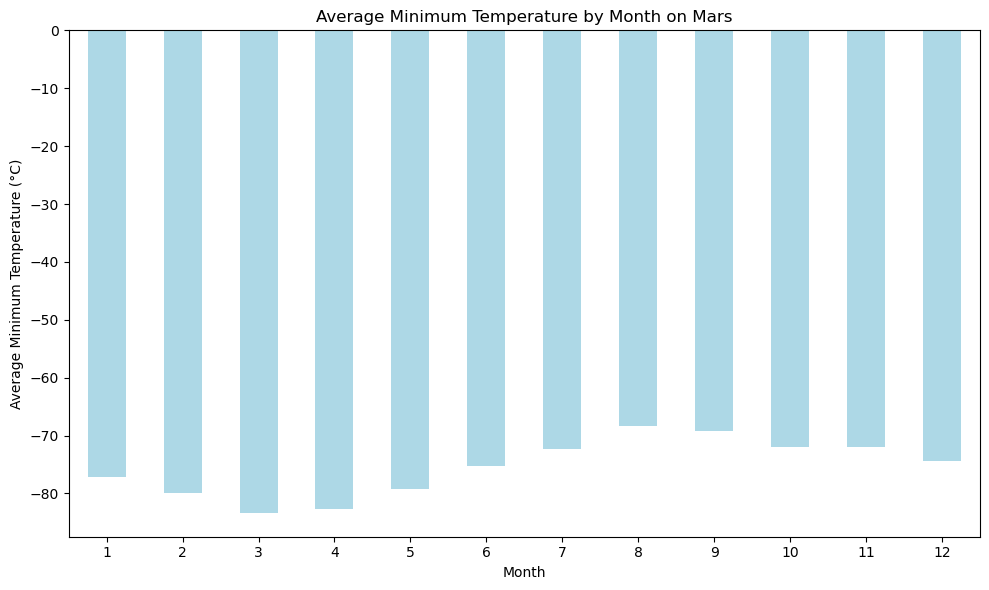

In [21]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='lightblue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

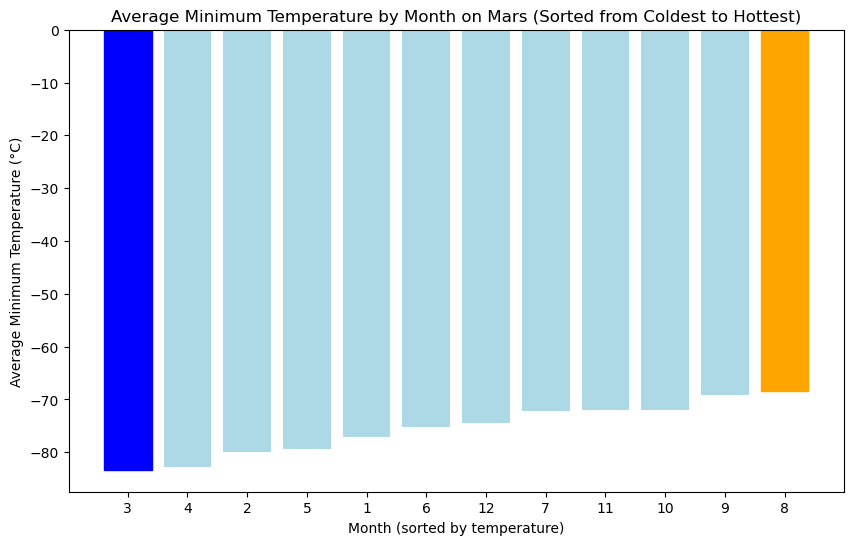

Month 3 on average has the lowest tempature, while month 8 has the highest


In [40]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the average minimum temperatures from lowest to highest
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Plot the sorted average minimum temperature by month
plt.figure(figsize=(10, 6))

# Create the bar plot with sorted values
bars = plt.bar(range(1, len(sorted_avg_min_temp_by_month) + 1), sorted_avg_min_temp_by_month.values, color='lightblue')

# Highlight the coldest and hottest months (first and last bars after sorting)
bars[0].set_color('blue')  # Coldest month (first bar after sorting)
bars[-1].set_color('orange')  # Hottest month (last bar after sorting)

# Add titles and labels
plt.title('Average Minimum Temperature by Month on Mars (Sorted from Coldest to Hottest)')
plt.xlabel('Month (sorted by temperature)')
plt.ylabel('Average Minimum Temperature (°C)')

# Add custom x-axis ticks showing the sorted months
plt.xticks(range(1, len(sorted_avg_min_temp_by_month) + 1), sorted_avg_min_temp_by_month.index)

# Display the plot
plt.show()
print("Month 3 on average has the lowest tempature, while month 8 has the highest") #analysis answer Which month, on average, has the lowest temperature? The highest? (10 points)
      

In [22]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print('Average pressure by month:')
print(avg_pressure_by_month)

Average pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


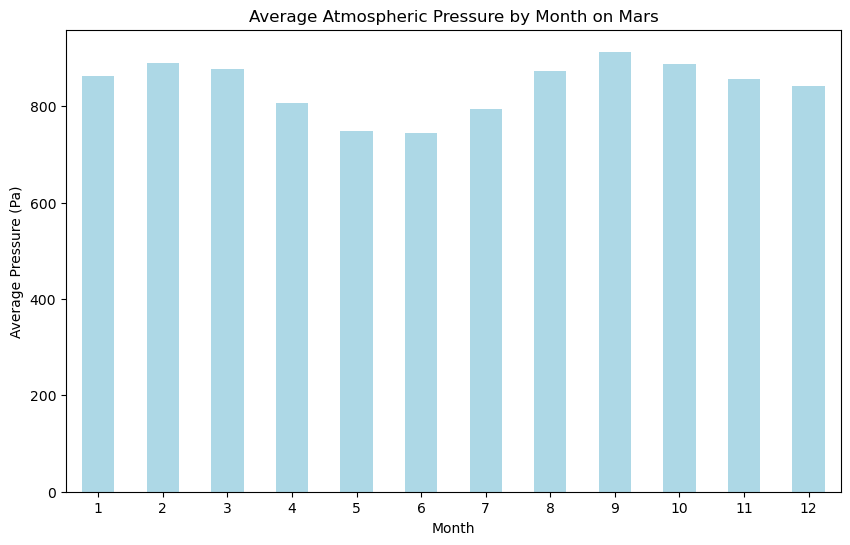

In [25]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='lightblue')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()

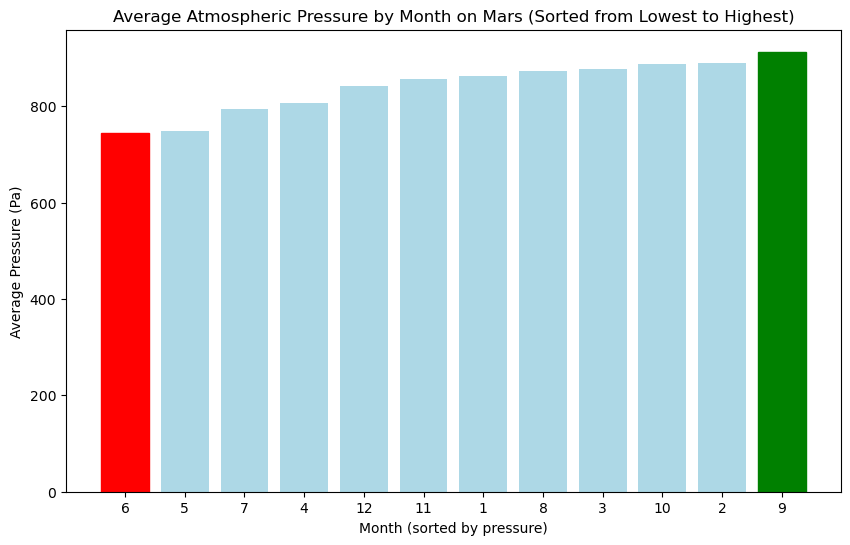

In [39]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the average pressure by month from lowest to highest
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Plot the sorted average pressure by month
plt.figure(figsize=(10, 6))

# Plot the sorted data
bars = plt.bar(range(1, len(sorted_avg_pressure_by_month) + 1), sorted_avg_pressure_by_month.values, color='lightblue')

# Highlight the lowest and highest pressure months (first and last bars after sorting)
bars[0].set_color('red')  # Lowest pressure
bars[-1].set_color('green')  # Highest pressure

# Add titles and labels
plt.title('Average Atmospheric Pressure by Month on Mars (Sorted from Lowest to Highest)')
plt.xlabel('Month (sorted by pressure)')
plt.ylabel('Average Pressure (Pa)')

# Add custom x-axis labels with sorted months
plt.xticks(range(1, len(sorted_avg_pressure_by_month) + 1), sorted_avg_pressure_by_month.index)

# Display the plot
plt.show()
print("Month 6 on average has the lowest amount of pressure, while month 9 has the highest") #analysis answer for Which month, on average, has the lowest atmospheric pressure? The highest? (10 points)

There are approximately 2021 terrestrial days in a Martian year.


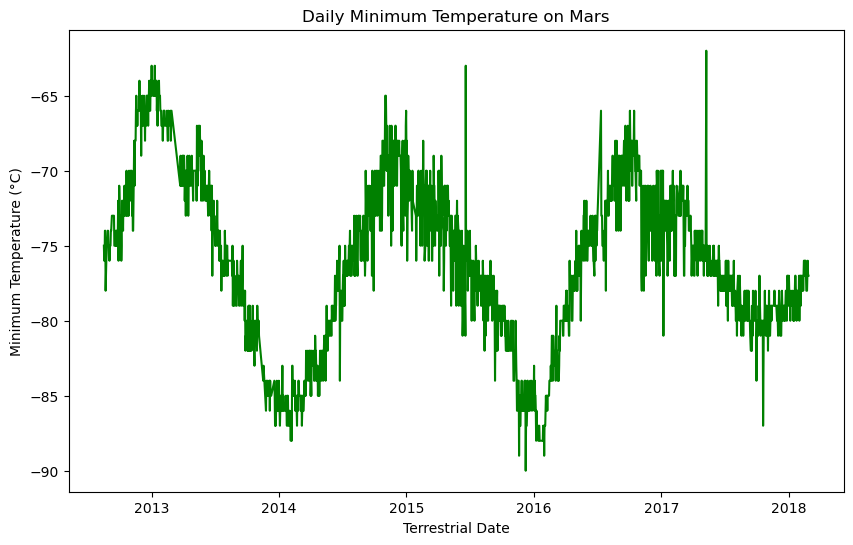

In [41]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
terrestrial_days = (df['terrestrial_date'].max() - df['terrestrial_date'].min()).days
print(f'There are approximately {terrestrial_days} terrestrial days in a Martian year.') #analysis answer for question How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='green')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
df.to_csv('mars_data.csv', columns=['min_temp', 'pressure'], index=False)

In [43]:
browser.quit()